In [3]:
from __future__ import print_function
import cv2 as cv
import argparse

In [4]:
face_cascade_name = 'data/haarcascades/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'data/haarcascades/haarcascade_eye_tree_eyeglasses.xml'

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)


In [10]:
from PIL import Image

# camera_device = args.camera
# #-- 2. Read the video stream
# cap = cv.VideoCapture(camera_device)
img_name1 = "data/brunet-man-wearing-hat-denim-shirt.jpg"
img_name2 = "data/expressive-redhead-guy-beige-shirt.jpg"
img_name3 = "data/young-woman-standing-confident-happy-gladly-answer-your-questions-standing-white-wall.jpg"


In [14]:
from matplotlib import pyplot as plt
def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 20)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 20)
    plt.imshow(frame)


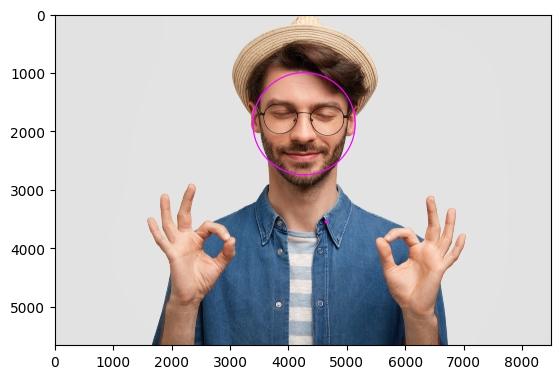

In [15]:
import numpy as np
img1 = Image.open(img_name1)
detectAndDisplay(np.array(img1))

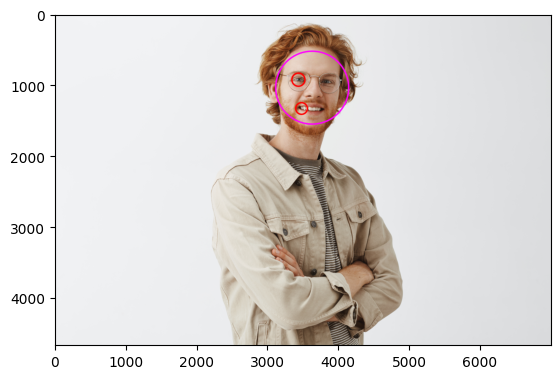

In [16]:
img2 = Image.open(img_name2)
detectAndDisplay(np.array(img2))

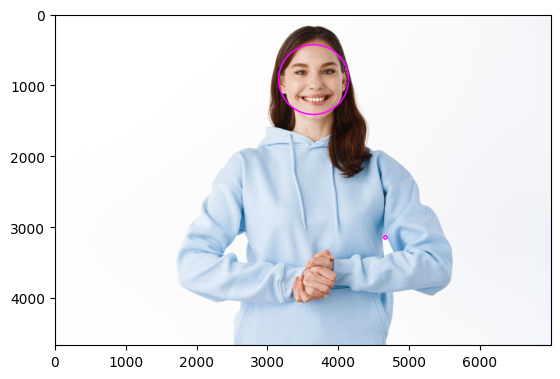

In [18]:
img3 = Image.open(img_name3)
detectAndDisplay(np.array(img3))

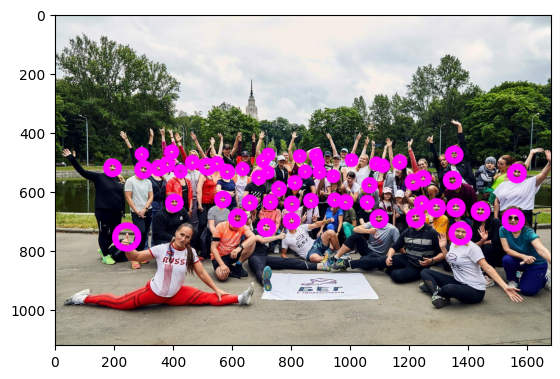

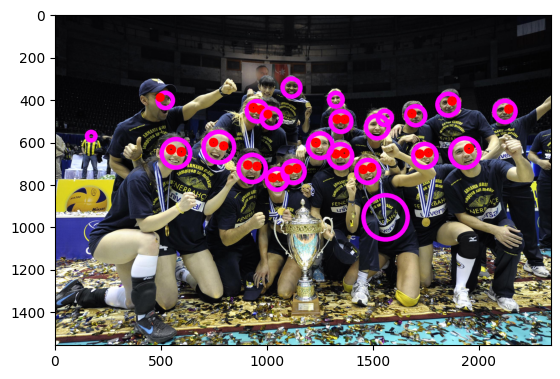

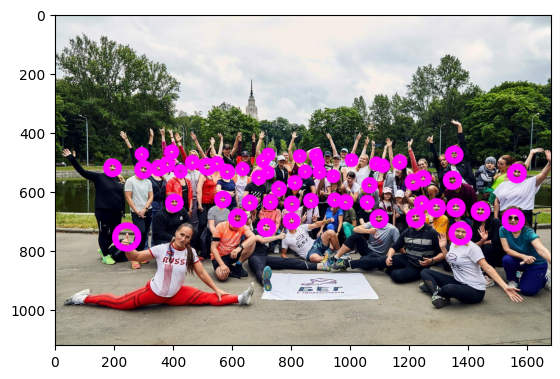

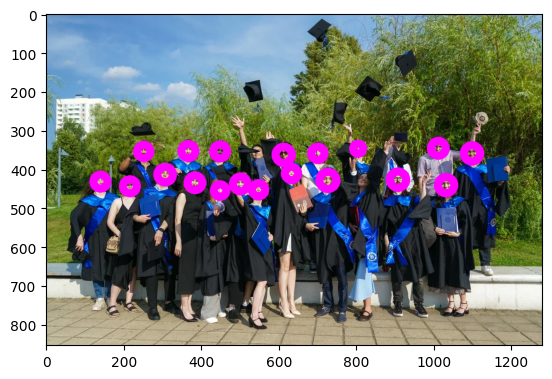

In [19]:
import os

for file_name in os.listdir("test_images"):
    img_name = os.path.join("test_images", file_name)
    img = Image.open(img_name)
    detectAndDisplay(np.array(img))
    plt.show()